<b>Краткое описание </b>

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
traffic = pd.read_csv('/datasets/tariffs.csv')
names = [data, calls, internet, messages, traffic]

In [3]:
data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [6]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
traffic.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
for i in names:
    i.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

<class 'pandas.core.frame

In [9]:
for i in names:
    display(i.describe())

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [10]:
data[data['churn_date'].notna()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


### Вывод

Пропусков в столбцах не обнаружено, за исключением столбца "churn_date", но эти пропуски означают, что абонент использует все еще тариф на момент выгрузки данных. Один столбец "Unnamed: 0" выглядит странно, он дублирует подсчет индексов таблицы, поэтому считаю ,что его можно удалить. Столбец "churn_date" имеет пропуски, но для нашего рассмотрения, он не потребуется.

## Подготовка данных

In [11]:
#Удаление выбивающегося столбца
internet = internet.drop('Unnamed: 0', axis=1)

In [12]:
#Округление использованного трафика и переименование столбцов
traffic['mb_per_month_included'] /=1024
traffic = traffic.rename(columns={'mb_per_month_included':'gb_per_month_included', 'tariff_name':'tariff'})

In [13]:
#Приводим к правильному типу формат даты
data['reg_date'] = pd.to_datetime(data['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [14]:
#Создание столбцов с месяцами
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [15]:
#Округляем звонки
calls['duration'] = np.ceil(calls['duration'])

In [16]:
#Производим группировку данных по клиенту и месяцу
messages_month = messages.groupby(['user_id','month']).agg({'id':'count'}).reset_index()
calls_month = calls.groupby(['user_id','month']).agg({'duration' : ['sum', 'count']}).reset_index()
internet_month =internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
internet_month['mb_used'] = np.ceil(internet_month['mb_used']/1024)
internet_month.columns = ['user_id','month','gb_used']
messages_month.columns = ['user_id','month','count_mess']
calls_month.columns = ['user_id','month','call_sum', 'call_count']

In [17]:
#Соединяем нужные таблицы воедино
calls_month = (calls_month
               .merge(messages_month, on=['user_id', 'month'], how='outer')
               .merge(internet_month, on=['user_id', 'month'], how='outer')
              )
data = data.merge(calls_month, on='user_id', how='left').merge(traffic, on='tariff')

In [18]:
data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,call_sum,call_count,count_mess,gb_used,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,3.0,1000,30.0,3000,1950,150,1,1
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23.0,1000,30.0,3000,1950,150,1,1
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14.0,1000,30.0,3000,1950,150,1,1
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14.0,1000,30.0,3000,1950,150,1,1
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,15.0,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,41.0,42.0,21.0,50,15.0,500,550,200,3,3
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,9.0,11.0,2.0,50,15.0,500,550,200,3,3
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,68.0,48.0,18.0,50,15.0,500,550,200,3,3
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,74.0,59.0,18.0,50,15.0,500,550,200,3,3


In [19]:
#напишем функцию для расчета выручки
def gain(row):
    money = 0
    if row['call_sum'] > row['minutes_included']:
        money+=(row['call_sum']-row['minutes_included'])*row['rub_per_minute']
    elif row['count_mess'] > row['messages_included']:
        money+=(row['count_mess']-row['messages_included'])*row['rub_per_message']
    elif row['gb_used'] > row['gb_per_month_included']:
        money+=(row['gb_used']-row['gb_per_month_included'])*row['rub_per_gb']
    return(money+row['rub_monthly_fee'])

In [20]:
data['gain'] = data.apply(gain, axis=1)

In [21]:
data['gain'].unique()

array([1950., 3900., 2850., 2700., 4800., 3300., 2400., 2550., 2250.,
       3150., 3750., 3000., 2100., 3450., 3600., 4650., 4200., 4050.,
       1150.,  550., 1550.,  950., 1350.,  868., 1186.,  835.,  886.,
        757.,  907.,  556., 1219.,  691.,  826.,  750.,  685.,  781.,
       1750., 1015.,  790.,  568., 2350.,  595.,  940.,  553., 2150.,
       2750., 3350.,  559.,  619.,  640.,  718.,  604.,  583.,  622.,
       1072.,  586.,  721.,  706.,  694.,  592., 1009.,  739.,  655.,
        643.,  919.,  598.,  877., 1087., 1723.,  703.,  679.,  673.,
        676., 1045.,  736.,  613.,  571.,  631.,  616., 1240.,  697.,
        874.,  589.,  562.,  712., 1057., 1633., 1234., 2950.,  661.,
        574.,  565.,  715., 1336., 1516.,  601., 1168., 1498., 1768.,
       1096., 1627.,  742., 1261.,  931.,  865., 1066., 1174., 1012.,
        724.,  841., 1210., 1153., 1063., 1165., 1213., 1222.,  748.,
        808., 1228.,  967.,  814., 1354.,  733.,  610.,  607.,  769.,
        667., 1195.,

### Вывод

Столбец "churn_date" нас не будет интересовать, поэтому его оставим без изменений. Привел столбцы с датами к удобному для работы формату. Удалил столбец-дубликат индексации. Создал идентифицирующие столбцы с месяцами в каждом наборе данных, кроме основного с клиентами. Округлил необходимые столбцы и переименовал, тк в некоторых произвел изменения. Посчитал средние показатели за месяц у каждого абонента. Соединил таблицы в единую, добавив сведения о тарифе каждому пользователю. Произвел рассчет выручки.

## Обработка данных

In [22]:
data_smart = data.query('tariff =="smart"')
data_ultra = data.query('tariff =="ultra"')

array([[<AxesSubplot:title={'center':'call_sum'}>]], dtype=object)

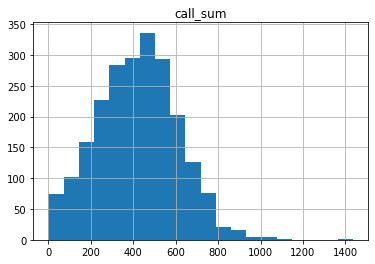

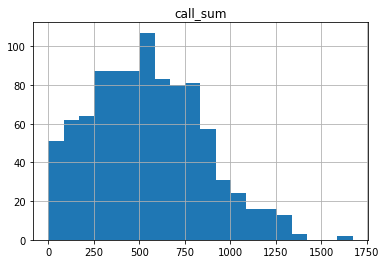

In [23]:
data_smart.hist('call_sum', bins=20)
data_ultra.hist('call_sum', bins=20)

Наблюдаются два нормальных распределения, скошенных влево.

array([[<AxesSubplot:title={'center':'gb_used'}>]], dtype=object)

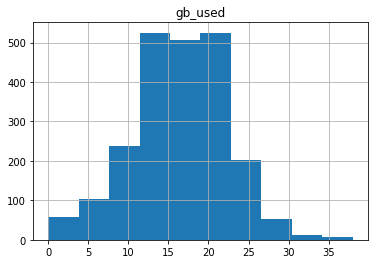

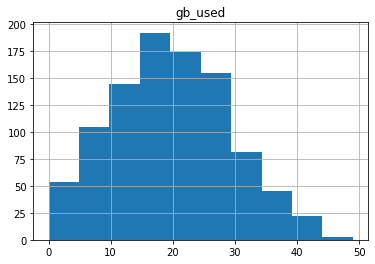

In [24]:
data_smart.hist('gb_used', bins=10)
data_ultra.hist('gb_used', bins=10)

Два нормальных распределения, у тарифа "Ультра" есть малое смещение влево

array([[<AxesSubplot:title={'center':'count_mess'}>]], dtype=object)

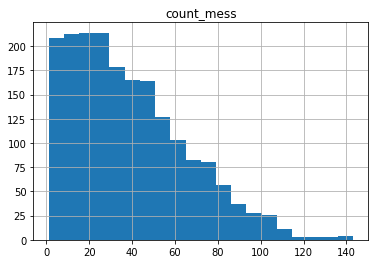

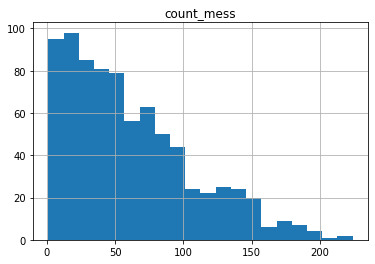

In [25]:
data_smart.hist('count_mess', bins=20)
data_ultra.hist('count_mess', bins=20)

Среднее количество сообщений имеет вид распределения Пуассона

array([[<AxesSubplot:title={'center':'gain'}>]], dtype=object)

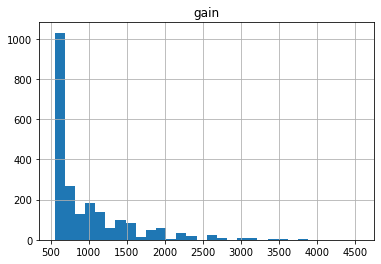

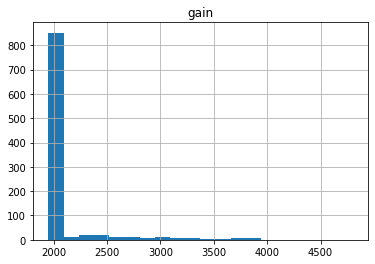

In [26]:
data_smart.hist('gain', bins=30)
data_ultra.hist('gain', bins=20)

In [27]:
data.pivot_table(index='tariff', values='gain', aggfunc= ['mean', 'var','std']).reset_index()

,tariff,mean,var,std
,,gain,gain,gain
0,smart,952.668610,304420.200136,551.742875
1,ultra,2070.030426,141387.714809,376.015578


Как можно заметить, пользователи тарифа смарт тратят в среднем больше своей месячной платы,

In [28]:
display(data_smart.describe())
data_ultra.describe()

,user_id,age,month,call_sum,call_count,count_mess,gb_used,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gain
count,2230.000000,2230.000000,2229.000000,2223.000000,2223.000000,1922.000000,2228.000000,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.000000
mean,1246.562332,46.557848,8.346792,419.062978,58.621233,38.716441,16.336176,50.0,15.0,500.0,550.0,200.0,3.0,3.0,952.668610
std,146.110501,16.349865,2.920316,189.325618,25.796101,26.787949,5.737923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,551.742875
min,1001.000000,18.000000,1.000000,0.000000,1.000000,1.000000,0.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,32.000000,6.000000,285.000000,40.000000,17.000000,13.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,550.000000
50%,1240.000000,47.000000,9.000000,423.000000,60.000000,34.000000,17.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,722.500000
75%,1376.000000,62.000000,11.000000,545.500000,76.000000,55.000000,20.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,1150.000000
max,1499.000000,75.000000,12.000000,1435.000000,198.000000,143.000000,38.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,4550.000000


,user_id,age,month,call_sum,call_count,count_mess,gb_used,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gain
count,986.000000,986.000000,985.000000,951.000000,951.000000,795.000000,975.000000,986.0,986.0,986.0,986.0,986.0,986.0,986.0,986.000000
mean,1262.957404,46.838742,8.250761,545.451104,76.016824,61.161006,19.694359,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2070.030426
std,140.689268,17.099807,2.871762,306.925754,42.403348,45.931026,9.702924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.015578
min,1000.000000,18.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,30.000000,6.000000,310.000000,43.000000,24.000000,12.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,45.000000,9.000000,528.000000,75.000000,51.000000,19.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,63.000000,11.000000,756.500000,105.000000,87.500000,27.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,75.000000,12.000000,1673.000000,244.000000,224.000000,49.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,4800.000000


### Вывод

Пользователи тарифа смарт чаще выходят за свои тарифные лимиты и переплачивают за услуги. В среднем пользователям нехватает лишних 10% тарифа, кроме интернета, который превышает 30% от тарифа. По значениям 3 процентиля можно сделать вывод о большинстве пользователей, пользующихся услугами компании. Минут должно быть 545, СМС 55, а ГБ интернета 20

Пользователи тарифа ультра редко используют полностью лимиты своего тарифа, а значит приносят больше выручки, потому что переплачивают. Для тарифа ультра в среднем должно быть: минут 756, СМС 87, ГБ интернета 27.

## Проверка гипотез
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза: Средняя выручка пользователей тарифов "Ультра" и "Смарт" равны

Альтернативная гипотеза: Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

Критический уровень статистической значимости 0.01

In [29]:
# Дисперсии не равны и размер выборки различный, поэтому equal_var=False
st.ttest_ind(data_smart['gain'], data_ultra['gain'], equal_var=False)

Ttest_indResult(statistic=-66.78628651430601, pvalue=0.0)

Нулевая гипотеза о равенстве средних отклоняется, потому что pvalue =0, в силу вступает альтернативная гипотеза. Что выручка пользователей двух тарифов различается.

In [30]:
print('Средняя выручка тарифа смарт =', data_smart['gain'].mean())
print('Средняя выручка тарифа ультра =', data_ultra['gain'].mean())
print('Суммарная выручка тарифа смарт =', data_smart['gain'].sum())
print('Суммарная выручка тарифа ультра =', data_ultra['gain'].sum())
print(round(len(data_smart['gain'])/len(data['gain'])*100),"% пользователей имеют тариф смарт")
print(round(len(data_ultra['gain'])/len(data['gain'])*100),"% пользователей имеют тариф ультра")

Средняя выручка тарифа смарт = 952.6686098654709
Средняя выручка тарифа ультра = 2070.030425963489
Суммарная выручка тарифа смарт = 2124451.0
Суммарная выручка тарифа ультра = 2041050.0
69 % пользователей имеют тариф смарт
31 % пользователей имеют тариф ультра


Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Критический уровень статистической значимости 0.01

In [31]:
moscow = data.query('city == "Москва"')
others = data.query('city !="Москва"')

In [32]:
# Дисперсии не равны и размер выборки различный, поэтому equal_var=False
st.ttest_ind(moscow['gain'], others['gain'], equal_var=False)

Ttest_indResult(statistic=2.923188951082392, pvalue=0.0035482551256135865)

Нулевая гипотеза о равенстве средних отклоняется, потому что pvalue =0.003, в силу вступает альтернативная гипотеза. Что выручка от пользователей в Москве отличается от выручки других регионов.

In [33]:
print('Средняя выручка по Москве =', moscow['gain'].mean())
print('Средняя выручка по другим городам =', others['gain'].mean())
print('Суммарная выручка по Москве =', moscow['gain'].sum())
print('Суммарная выручка по другим городам =', others['gain'].sum())
print(round(len(moscow['gain'])/len(data['gain'])*100),"% пользователей из Москвы")
print(round(len(others['gain'])/len(data['gain'])*100),"% пользователей других регионов")

Средняя выручка по Москве = 1370.7414075286415
Средняя выручка по другим городам = 1277.5347408829175
Суммарная выручка по Москве = 837523.0
Суммарная выручка по другим городам = 3327978.0
19 % пользователей из Москвы
81 % пользователей других регионов


## Общий вывод

В ходе исследования были произведены обработка и анализ данных:
* Изучил данные из разных таблиц, обработал некорректные столбцы
* Произвел подсчеты месячных статистик по пользователям (смс, интернет трафик, звонки, выручку)
* Были выявлены характерные числа пакетов для каждого тарифа
* Посчитана дисперсия и стандартное отклонение для выручки
* Графически изучены распределения пакетов тарифов
* Проверены гипотез

Подводя итоги, можно сосредоточиться на рекламе тарифа Ультра, потому что процент пользователей с этим тарифом ниже другого, но приносят суммарной прибыли они почти одинаково, а значит тариф Ультра более выгодный для компании. Также пользователи тарифа Ультра в среднем не расходуют полностью свой пакет, а значит меньше затрачивается ресурс компании и выручка больше.

Поставленные гипотезы были подтверждены как статистически, так и логически и вычислительно.

Также были выявлены показатели для большинства пользователей тарифов. Пользователям тарифа Смарт нехватает своих лимитов чаще, чем пользователям тарифа Ультра